In [1]:
import sys
import numpy as np
sys.path.append('/Users/IzmailovPavel/Documents/Education/Projects/Course Project/Code')
import numpy as np
import matplotlib as mpl

from matplotlib import pyplot as plt

from GP.covariance_functions import SquaredExponential
from GP.gaussian_process_regression import GPR

from sklearn.cluster import KMeans

from sklearn.datasets import load_svmlight_file
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import orth
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [31]:
data_params = np.array([1.0, 0.3, 0.1])
data_covariance_obj = SquaredExponential(data_params)

In [32]:
gp = GPR(data_covariance_obj)
num = 300
test_num = 100
dim = 2
seed = 10

In [71]:
np.random.seed(seed)
x_tr = np.random.normal(size=(dim, num))
if dim == 1:
    x_test = np.linspace(0, 1, test_num)
    x_test = x_test.reshape(1, test_num)
else:
    x_test = np.random.normal(size=(dim, test_num))

x_tr /= 3
x_test /= 3
y_tr, y_test = gp.generate_data(x_tr, x_test, seed=seed)
x_tr = x_tr.T
x_test = x_test.T

In [75]:
d = x_tr.shape[1] # == 2
D = 3
P = np.random.rand(D, d)
P = orth(P)

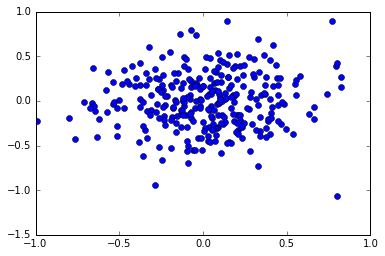

In [78]:
plt.plot(x_tr[:, 0], x_tr[:, 1], 'bo')

In [79]:
projected = x_tr.dot(P.T)
projected_test = x_test.dot(P.T)

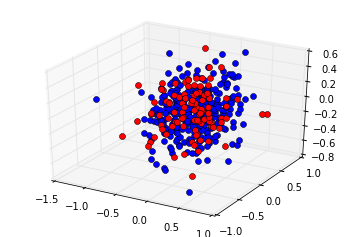

In [80]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(projected[:, 0], projected[:, 1], projected[:, 2], 'bo')
ax.plot(projected_test[:, 0], projected_test[:, 1], projected_test[:, 2], 'ro')

In [81]:
np.save('x_tr.npy', projected)
np.save('x_te.npy', projected_test)
np.save('y_tr.npy', y_tr)
np.save('y_te.npy', y_test)